In [ ]:
import pandas as pd;
import numpy as np;
import seaborn as sns;
from sklearn.ensemble import GradientBoostingClassifier;
from sklearn.model_selection import GridSearchCV;
import matplotlib.pyplot as plt;
from sklearn.metrics import f1_score, classification_report, accuracy_score;
from sklearn.preprocessing import LabelEncoder;
from sklearn.model_selection import train_test_split,  KFold;
from sklearn.ensemble import RandomForestClassifier, VotingClassifier;
from sklearn.svm import SVC;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.ensemble import GradientBoostingClassifier;
from sklearn.neighbors import KNeighborsClassifier;
from sklearn.naive_bayes import GaussianNB;
from sklearn import svm;
from mlxtend.evaluate import bias_variance_decomp

#====================  B1 Đọc dữ liệu và hiểu dữ liệu ====================================
df = pd.read_csv('/content/sample_data/NurseryDataset.csv', delimiter=',');
df.head(5)

# Lấy tên cột của dataset
colnames = df.columns;

In [ ]:
#  Hiểu dữ liệu: phân tích về số lượng, chi tiết, lớp và các thuộc tính
print(df.describe())
print(df.isnull().sum());
df.info()
''' -----------------------------------------------------------------------------
=> Không có dữ liệu null, không có dữ liệu bị thiếu

Dataset: có 12960 trường hợp, 8 thuộc tính với 5 lớp khác nhau
- 9 thuộc tính bao gồm:
            parents (5): Nghề nghiệp của cha mẹ
            has_nurs (5): Nơi trông con
            form (4): Hình thức của gia đình
            children (6): Số lượng trẻ em
            housing (3): Điều kiện nhà ở
            finance (4): Tình hình tài chính của gia đình
            social (3): Tình hình xã hội
            health (3): Tình hình sức khỏe
        5 class (5): 'recommend' 'priority' 'not_recom' 'very_recom' 'spec_prior

'''
# => Tập dữ liệu có nhãn. Nhãn là cột class. Nhãn rời rạc nên đây là bài toán phân loại (classification)
# => Tập dữ liệu đang ở kiểu chuỗi -> cần chuẩn hóa sang số.
# => Cần kiểm tra cụ thể các loại giá trị bên trong mỗi cột

            parents has_nurs      form children     housing finance   social  \
count         12960    12960     12960    12960       12960   12960    12960   
unique            5        5         4        6           3       4        3   
top     pretentious   proper  complete        1  convenient  inconv  nonprob   
freq           4320     2592      3240     3241        4320    6480     4320   

             health      class  
count         12960      12960  
unique            3          5  
top     recommended  not_recom  
freq           4320       4320  
parents     0
has_nurs    0
form        0
children    0
housing     0
finance     0
social      0
health      0
class       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   parents   12960 non-null  object
 1   has_nurs  12960 non-null  object
 2   form      12960 non-null  obje

" -----------------------------------------------------------------------------\n=> Không có dữ liệu null, không có dữ liệu bị thiếu\n\nDataset: có 12960 trường hợp, 8 thuộc tính với 5 lớp khác nhau\n- 9 thuộc tính bao gồm:\n            parents (5): Nghề nghiệp của cha mẹ\n            has_nurs (5): Nơi trông con\n            form (4): Hình thức của gia đình\n            children (6): Số lượng trẻ em\n            housing (3): Điều kiện nhà ở\n            finance (4): Tình hình tài chính của gia đình\n            social (3): Tình hình xã hội\n            health (3): Tình hình sức khỏe\n        5 class (5): 'recommend' 'priority' 'not_recom' 'very_recom' 'spec_prior\n\n"

In [ ]:
# Xem số lượng dữ liệu trống (null)
null_info = pd.DataFrame({'Số giá trị null': df.isnull().sum(), 'Phần trăm giá trị null': df.isnull().sum()/len(df)})
null_info.drop('class', inplace=True)
null_info.sort_values(by='Phần trăm giá trị null', ascending=False, inplace=True)
null_info

,Số giá trị null,Phần trăm giá trị null
parents,0,0.0
has_nurs,0,0.0
form,0,0.0
children,0,0.0
housing,0,0.0
finance,0,0.0
social,0,0.0
health,0,0.0


**TIỀN XỬ LÝ DỮ LIỆU**

**XEM PHÂN PHỐI CÁC BIẾN TRONG TẬP DỮ LIỆU TRƯỚC KHI LÀM SACH**

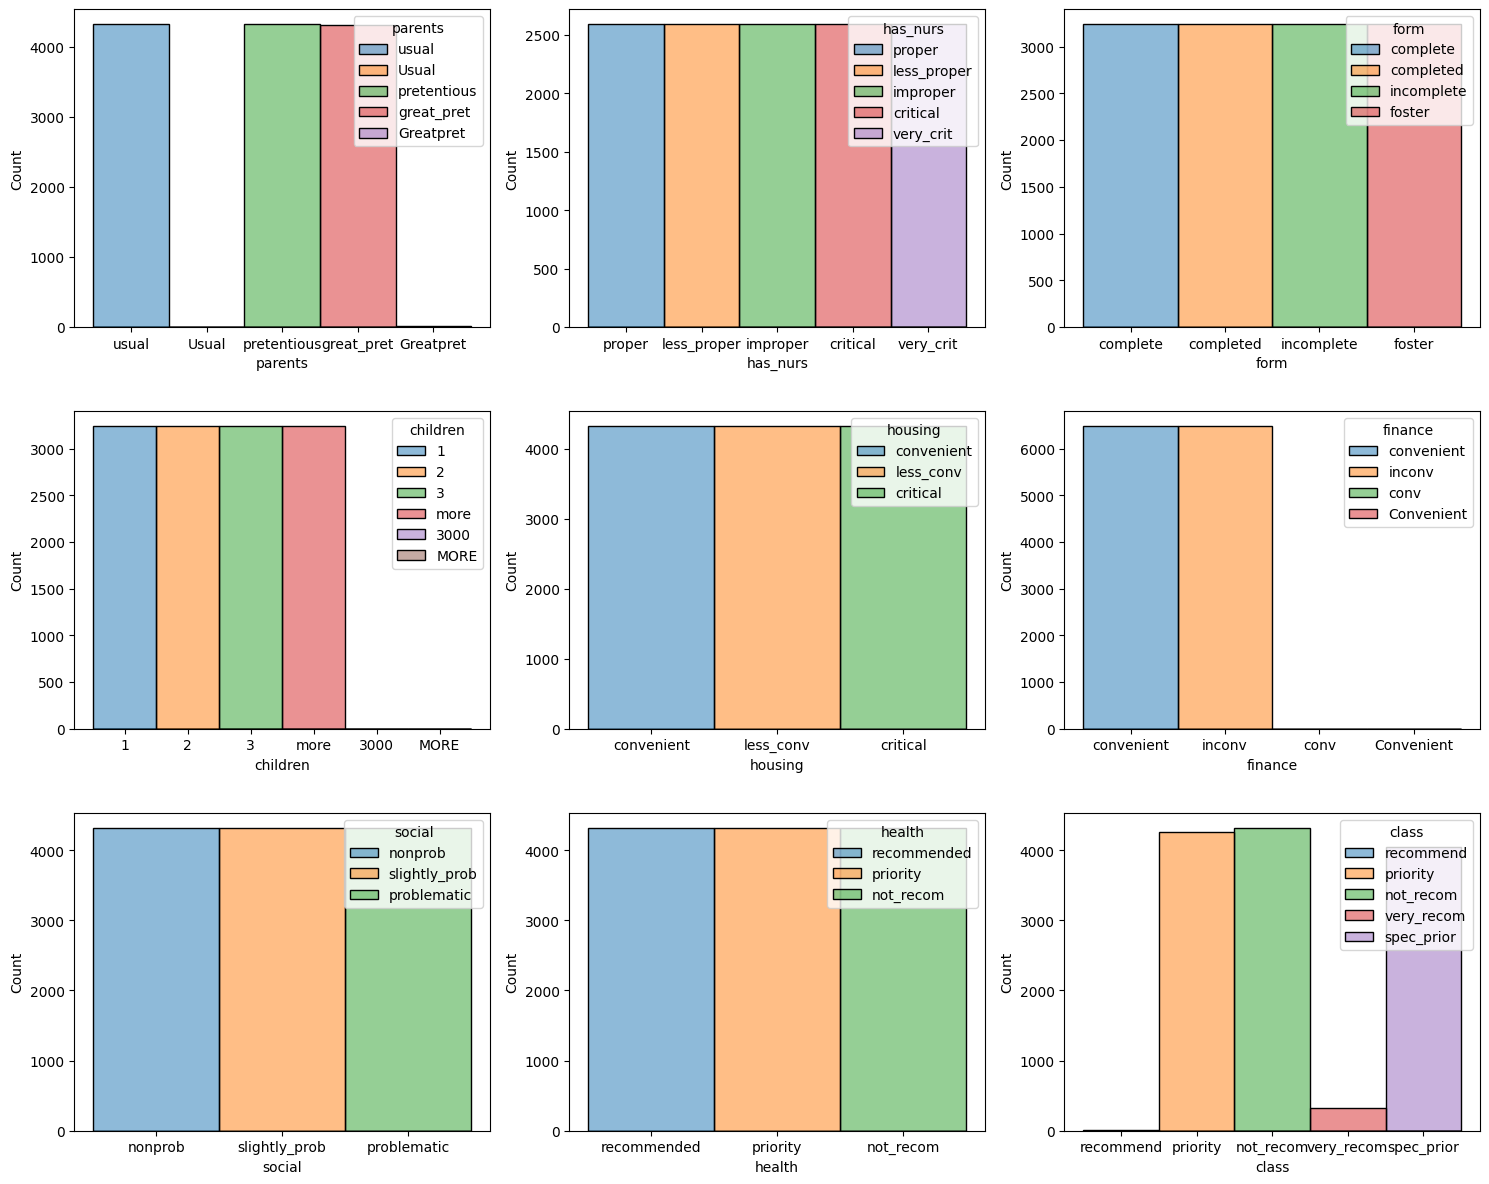

In [ ]:
# Điều chỉnh kích thước của hình
plt.figure(figsize=(15, 12))

# Lặp qua từng cột trong DataFrame và tạo các subplot
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)  # 1 hàng, 3 cột
    sns.histplot(df, x=column, hue=column, kde=True)  # Sử dụng sns.histplot thay vì sns.displot

# Điều chỉnh khoảng cách giữa các hàng
plt.subplots_adjust(hspace=2)  # Điều chỉnh khoảng cách dọc
plt.tight_layout()  # Đảm bảo không bị tràn ra khỏi hình
plt.show()


<Figure size 500x400 with 0 Axes>

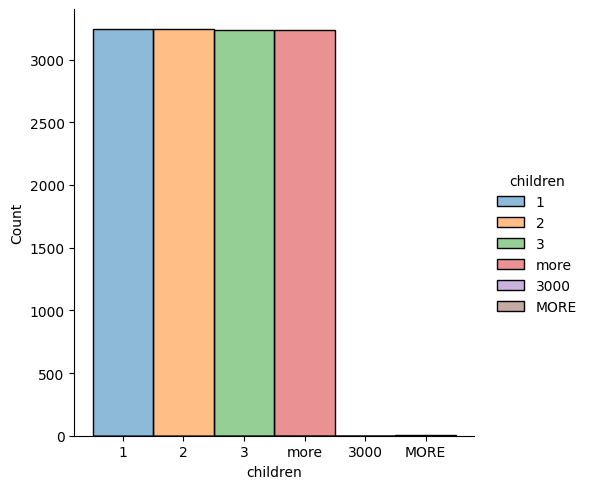

In [ ]:
plt.figure(figsize=(5,4))
sns.displot(df, x="children", hue="children")
plt.show()

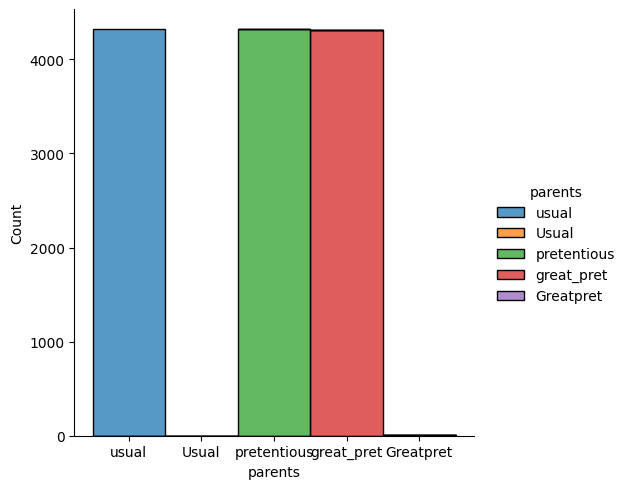

In [ ]:
sns.displot(df, x="parents", hue="parents",  multiple="stack")

In [ ]:
sns.displot(df, x="parents", y="class")

**LÀM SẠCH DỮ LIỆU**

In [ ]:
# ============================ B2. TIỀN XỬ LÝ DỮ LIỆU =============================================

# 1/ Xử lý hoa thường --------------------------------------------------------------------------
# Thực hiện chuẩn hóa chữ viết hoa thành chữ viết thường cho các cột cụ thể trong Dataframe (df)
df = df.apply(lambda x: x.str.lower() if x.name in colnames else x)


# 2/ Xử lý dữ liệu không đồng nhất -----------------------------------------------------------
# Xử lý sự bất đồng trong finance, parents
df['parents'] = df['parents'].replace('greatpret', 'great_pret');
df['finance'] = df['finance'].replace('conv', 'convenient');


# 3/ Dữ liệu số chữ không đồng nhất ở cột children -------------------------------------------------
df['children'] = df['children'].replace('3000', 3);
df['children'] = df['children'].replace('more', 4);
df['children'] = df['children'].astype(int);   # chuyển từ object -> int32 giúp tăng hiệu suất mô hình hơn

# Xuất ra dataset vừa chuẩn hóa
df.to_csv("dataset.csv", index=False);



In [ ]:
df

**Các biến có ảnh hưởng đến phân lớp**

In [ ]:
df[(df['parents'] == 'great_pret') & (df['class'] == 'very_recom')]


,parents,has_nurs,form,children,housing,finance,social,health,class


In [ ]:
df[(df['has_nurs'] == 'critical') & (df['class'] == 'spec_prior')]

,parents,has_nurs,form,children,housing,finance,social,health,class
2683,usual,critical,complete,2,critical,convenient,nonprob,priority,spec_prior
2686,usual,critical,complete,2,critical,convenient,slightly_prob,priority,spec_prior
2688,usual,critical,complete,2,critical,convenient,problematic,recommended,spec_prior
2689,usual,critical,complete,2,critical,convenient,problematic,priority,spec_prior
2692,usual,critical,complete,2,critical,inconv,nonprob,priority,spec_prior
...,...,...,...,...,...,...,...,...,...
12088,great_pret,critical,foster,more,critical,inconv,nonprob,priority,spec_prior
12090,great_pret,critical,foster,more,critical,inconv,slightly_prob,recommended,spec_prior
12091,great_pret,critical,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12093,great_pret,critical,foster,more,critical,inconv,problematic,recommended,spec_prior


In [ ]:
df[(df['housing'] == 'critical')
                            & (df['has_nurs'] == 'proper')
                            & (df['form'] == 'complete')
                            & (df['social'] == 'problematic')
                            & (df['class'] == 'spec_prior')
                            & (df['health'] == 'recommended')]

,parents,has_nurs,form,children,housing,finance,social,health,class
8736,great_pret,proper,complete,2,critical,convenient,problematic,recommended,spec_prior
8745,great_pret,proper,complete,2,critical,inconv,problematic,recommended,spec_prior
8790,great_pret,proper,complete,3,critical,convenient,problematic,recommended,spec_prior
8799,great_pret,proper,complete,3,critical,inconv,problematic,recommended,spec_prior
8844,great_pret,proper,complete,more,critical,convenient,problematic,recommended,spec_prior
8853,great_pret,proper,complete,more,critical,inconv,problematic,recommended,spec_prior


In [ ]:
df[df['health'] == 1]

**CHUYỂN ĐỔI DỮ LIỆU**

In [ ]:
# ================== ORDINAL ===================================================
# 'form', 'housing', 'finance',
for x in df.drop(['health', 'class'], axis=1).columns:
  lst = list(df[x].value_counts().index)
  dic = {k:i+1 for i, k in enumerate(lst)}
  print(lst)
  df[x].replace(dic, inplace=True)

df

['usual', 'pretentious', 'great_pret']
['proper', 'less_proper', 'improper', 'critical', 'very_crit']
['complete', 'completed', 'incomplete', 'foster']
[1, 2, 4, 3]
['convenient', 'less_conv', 'critical']
['convenient', 'inconv']
['nonprob', 'slightly_prob', 'problematic']


,parents,has_nurs,form,children,housing,finance,social,health,class
0,1,1,1,1,1,1,1,recommended,recommend
1,1,1,1,1,1,1,1,priority,priority
2,1,1,1,1,1,1,1,not_recom,not_recom
3,1,1,1,1,1,1,2,recommended,recommend
4,1,1,1,1,1,1,2,priority,priority
...,...,...,...,...,...,...,...,...,...
12955,3,5,4,3,3,2,2,priority,spec_prior
12956,3,5,4,3,3,2,2,not_recom,not_recom
12957,3,5,4,3,3,2,3,recommended,spec_prior
12958,3,5,4,3,3,2,3,priority,spec_prior


In [ ]:
dic1 = {'recommended':2, 'priority':3, 'not_recom':1}
dic2 = {'not_recom':1, 'recommend':2, 'very_recom':3, 'priority':4, 'spec_prior':5}
#
df['health'].replace(dic1, inplace=True)
df['class'].replace(dic2, inplace=True)

# Xuất ra dataset vừa đã chuyển đổi
df.to_csv("dataset_chuyendoi.csv", index=False);

In [ ]:
df

**TẠO TABLE CHO DỮ LIỆU CHUYỂN ĐỔI**

   Tên Biến                                   Trước chuyển đổi
0   parents   usual, Usual, pretentious, great_pret, Greatpret
1  has_nurs  proper, less_proper, improper, critical, very_...
2      form            complete, completed, incomplete, foster
3  children                          1, 2, 3, more, MORE, 3000
4   housing                    convenient, less_conv, critical
5   finance               convenient, inconv, conv, Convenient
6    social               non-prob, slightly_prob, problematic
7    health                   not_recom, recommended, priority
8     class  not_recom, recommended, very_recom, priority, ...


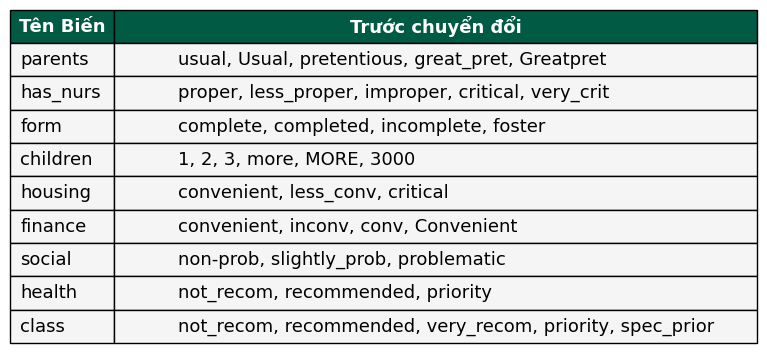

In [ ]:

data = [
    'parents: usual, Usual, pretentious, great_pret, Greatpret',
    'has_nurs: proper, less_proper, improper, critical, very_crit',
    'form: complete, completed, incomplete, foster',
    'children: 1, 2, 3, more, MORE, 3000',
    'housing: convenient, less_conv, critical',
    'finance: convenient, inconv, conv, Convenient',
    'social: non-prob, slightly_prob, problematic',
    'health: not_recom, recommended, priority',
    'class: not_recom, recommended, very_recom, priority, spec_prior'
]

# Tách dữ liệu thành hai cột
data = [item.split(': ', 1) for item in data]
data = pd.DataFrame(data, columns=['Tên Biến', 'Trước chuyển đổi'])

print(data)

# Tạo một subplot để vẽ biểu đồ table
fig, ax = plt.subplots(figsize=(8,4))
ax.axis('off')

# Vẽ biểu đồ dạng table
table = ax.table(cellText=data.values, colLabels=data.columns, cellLoc='left', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(13)  # Đặt kích thước chữ
table.scale(1, 2)  # Tăng kích thước dòng

# Tùy chỉnh màu sắc của hàng và cột
table.auto_set_column_width([0, 1, 2])

for i, key in enumerate(table.get_celld().keys()):
    cell = table.get_celld()[key]
    if key[0] == 0:  # Đặt màu sắc cho hàng đầu (tiêu đề)
        cell.set_text_props(weight='bold', color='w')
        cell.set_facecolor('#015A44')
    else:  # Đặt màu sắc cho các hàng khác
        cell.set_facecolor('#F5F5F5' if i % 2 == 0 else '#F5F5F5')

plt.show()


In [ ]:

data = [
    'parents: usual, pretentious, great_pret: 1, 2, 3',
    'has_nurs: proper, less_proper, improper, critical, very_crit: 1, 2, 3, 4, 5',
    'form: complete, completed, incomplete, foster: 1, 2, 3, 4',
    'children: 1, 2, 3, 4: 1, 2, 3, 4',
    'housing: convenient, less_conv, critical: 1, 2, 3',
    'finance: convenient, inconv: 1, 2',
    'social: non-prob, slightly_prob, problematic: 1, 2, 3',
    'health: not_recom, recommended, priority: 1, 2, 3',
    'class: not_recom, recommended, very_recom, priority, spec_prior: 1, 2, 3, 4, 5 '
]

# Tách dữ liệu thành hai cột
data = [item.split(': ', 2) for item in data]
data = pd.DataFrame(data, columns=['Tên Biến', 'Trước chuyển đổi', 'Sau chuyển đổi'])

# print(df)

# Tạo một subplot để vẽ biểu đồ table
fig, ax = plt.subplots(figsize=(8,4))
ax.axis('off')

# Vẽ biểu đồ dạng table
table = ax.table(cellText=data.values, colLabels=data.columns, cellLoc='left', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(13)  # Đặt kích thước chữ
table.scale(10, 2)  # Tăng kích thước dòng

# Tùy chỉnh màu sắc của hàng và cột
table.auto_set_column_width([0, 1, 2])

for i, key in enumerate(table.get_celld().keys()):
    cell = table.get_celld()[key]
    if key[0] == 0:  # Đặt màu sắc cho hàng đầu (tiêu đề)
        cell.set_text_props(weight='bold', color='w')
        cell.set_facecolor('#015A44')
    else:  # Đặt màu sắc cho các hàng khác
        cell.set_facecolor('#F5F5F5' if i % 2 == 0 else '#F5F5F5')

plt.show()

# plt.show()

NameError: ignored

**VẼ BIỂU ĐỒ TRỰC QUAN DỮ LIỆU SAU CHUYỂN ĐỔI**

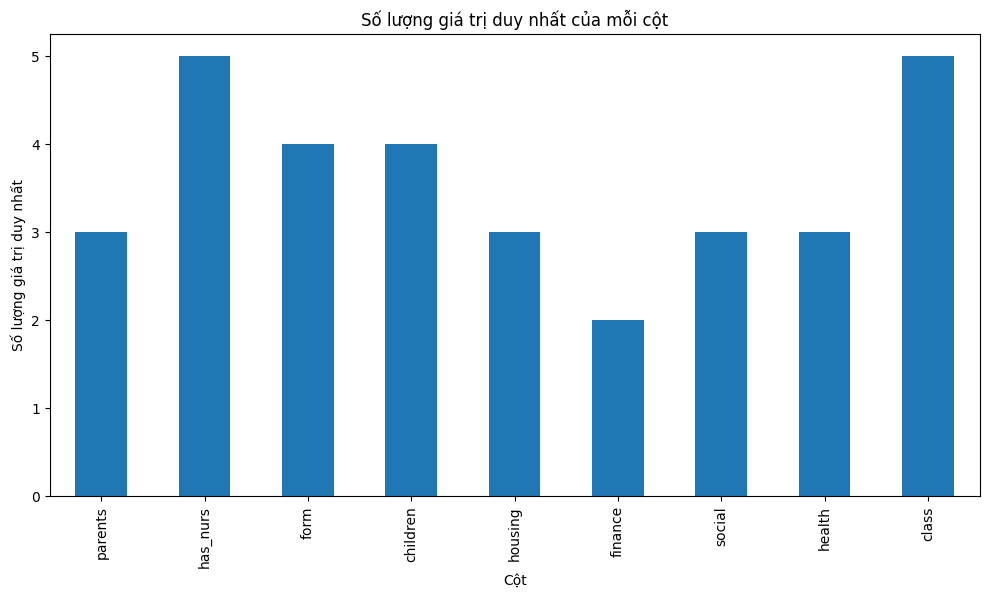

In [ ]:
# Tạo biểu đồ bar chart hiển thị số lượng giá trị duy nhất của mỗi cột
unique_counts = df.nunique()
unique_counts.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Cột')
plt.ylabel('Số lượng giá trị duy nhất')
plt.title('Số lượng giá trị duy nhất của mỗi cột')
plt.show()

In [ ]:
df.corr()

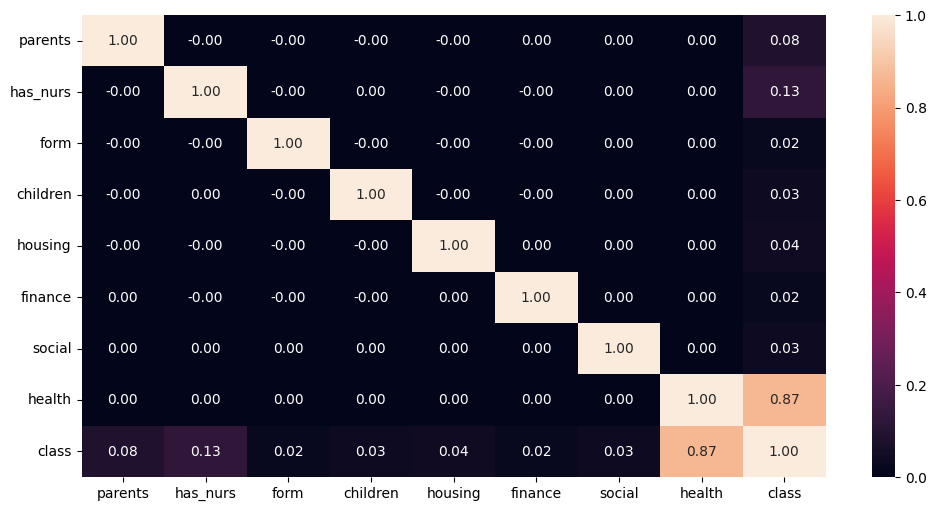

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f');

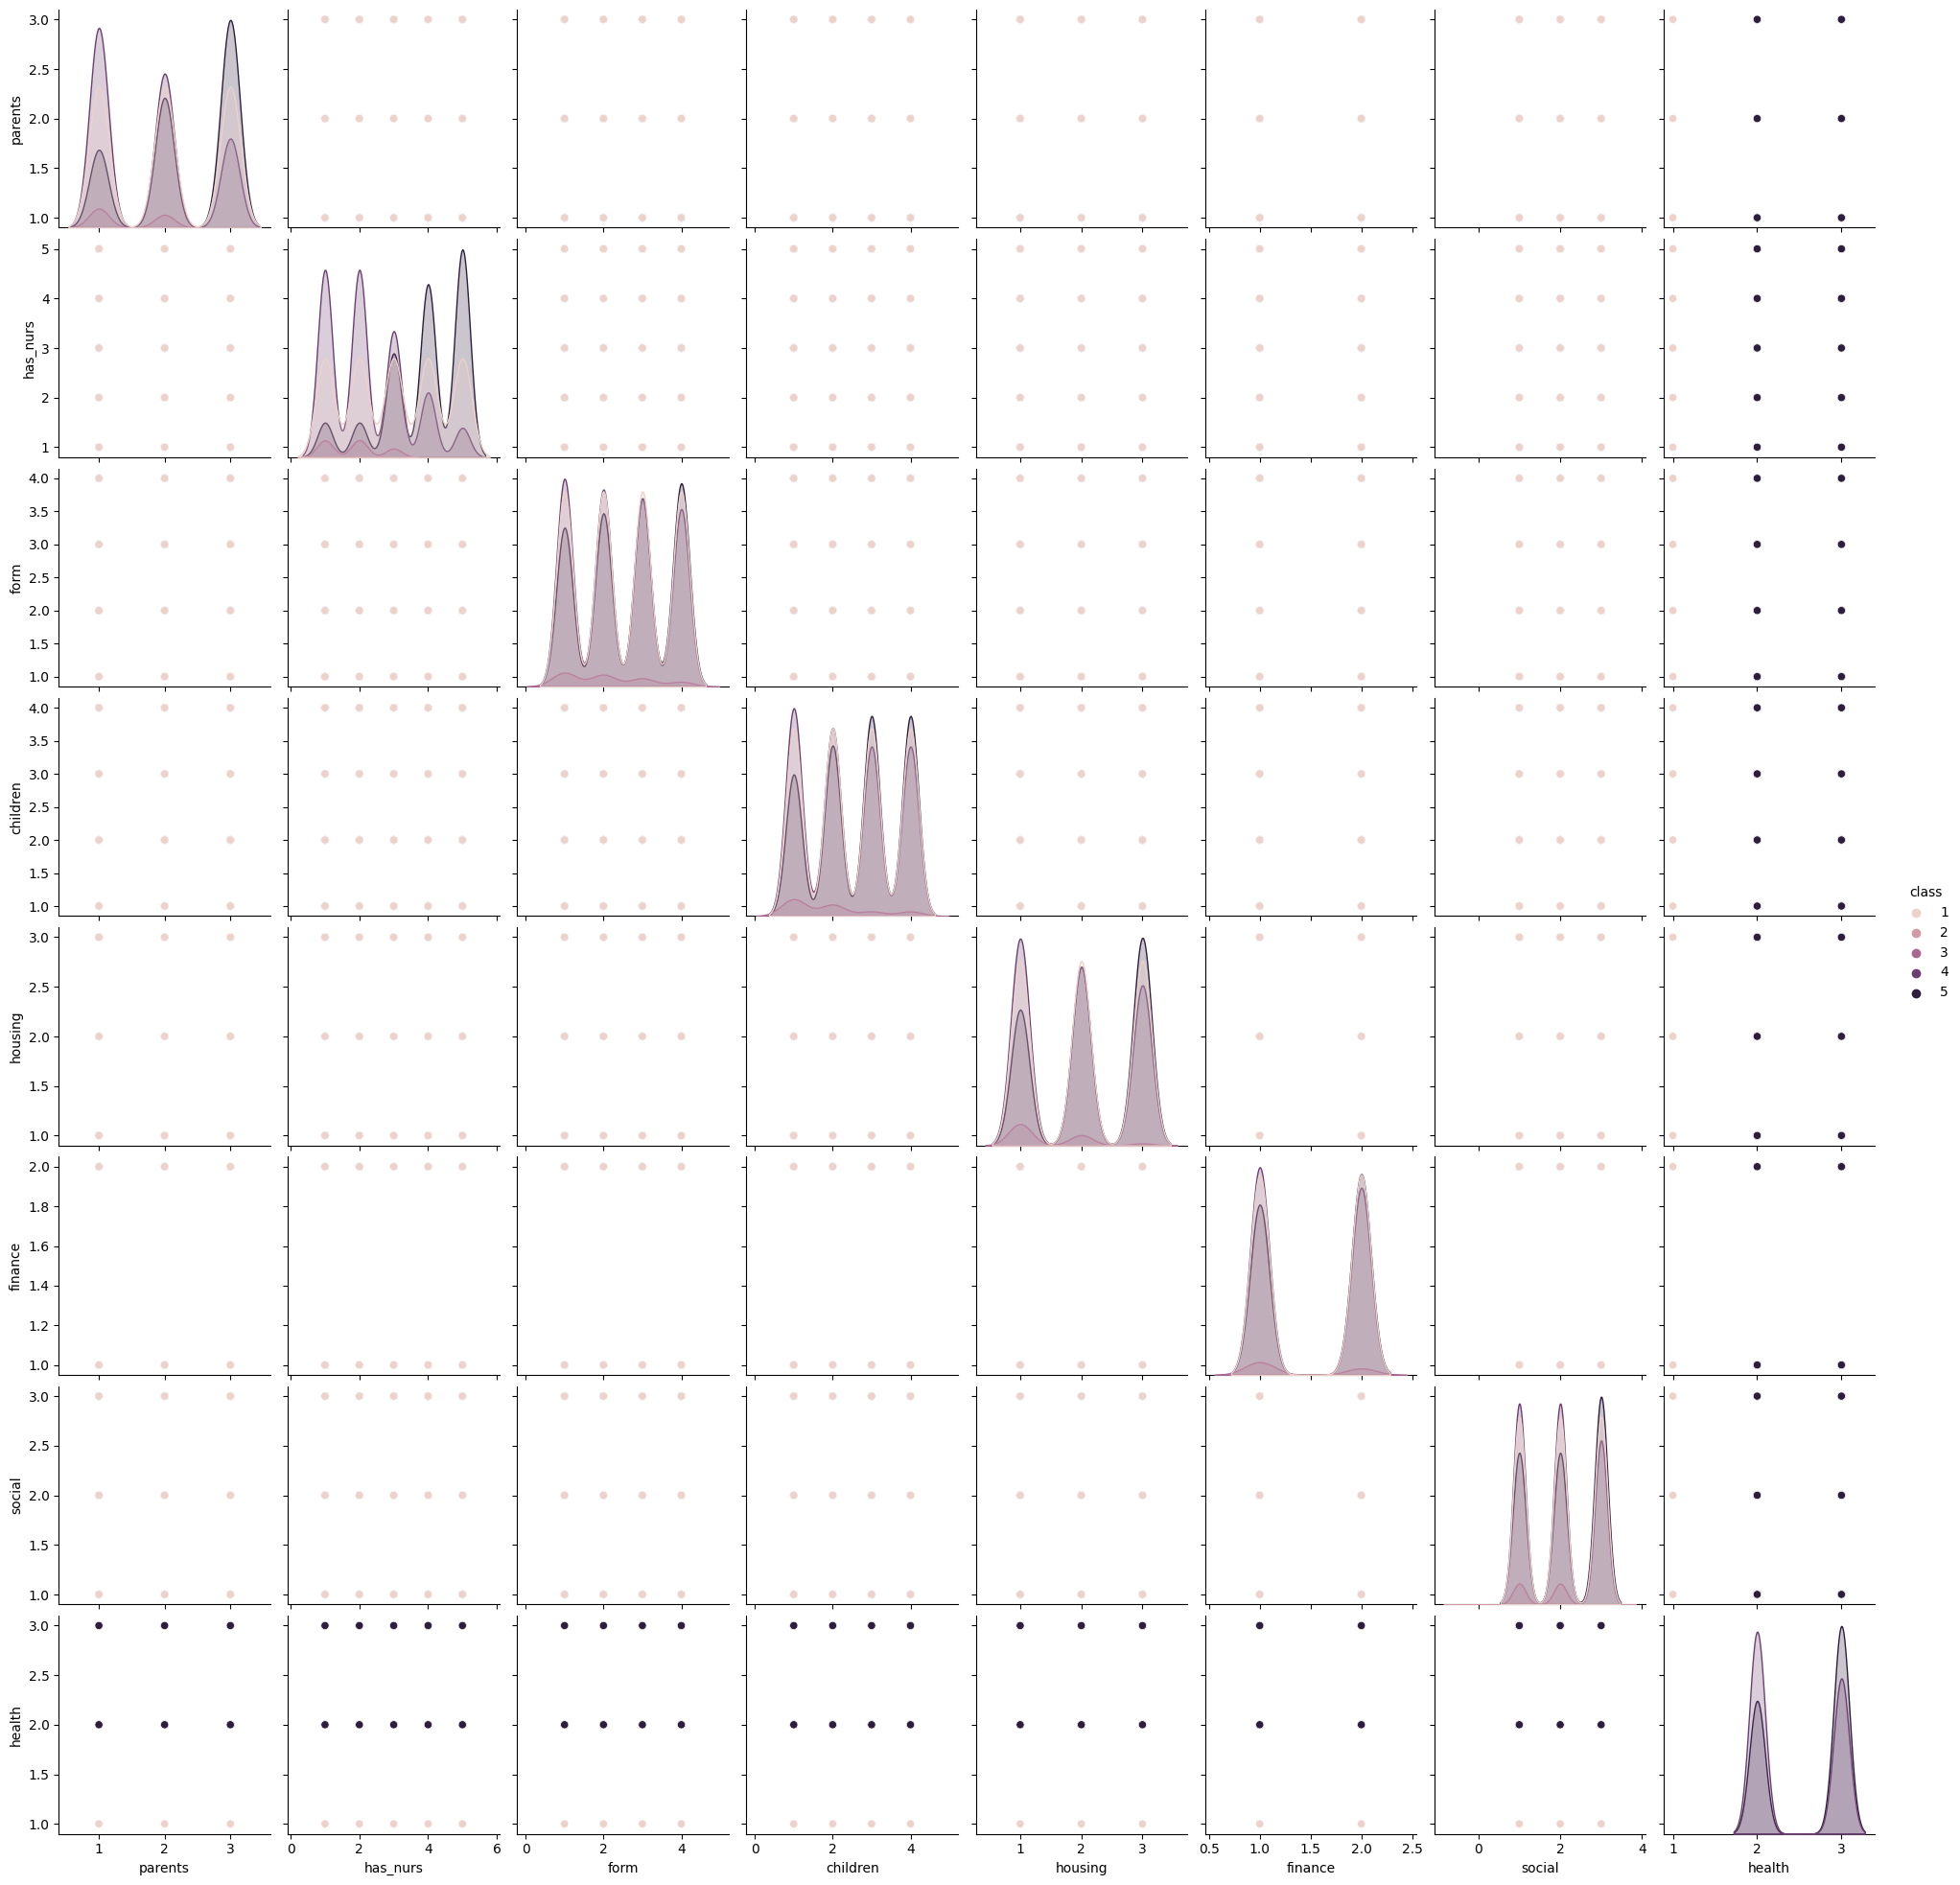

In [ ]:
# biểu đồ so sánh quan hệ giữa các cặp thuộc tính phân chia theo loài hoa
sns.pairplot(data=df,hue='class');

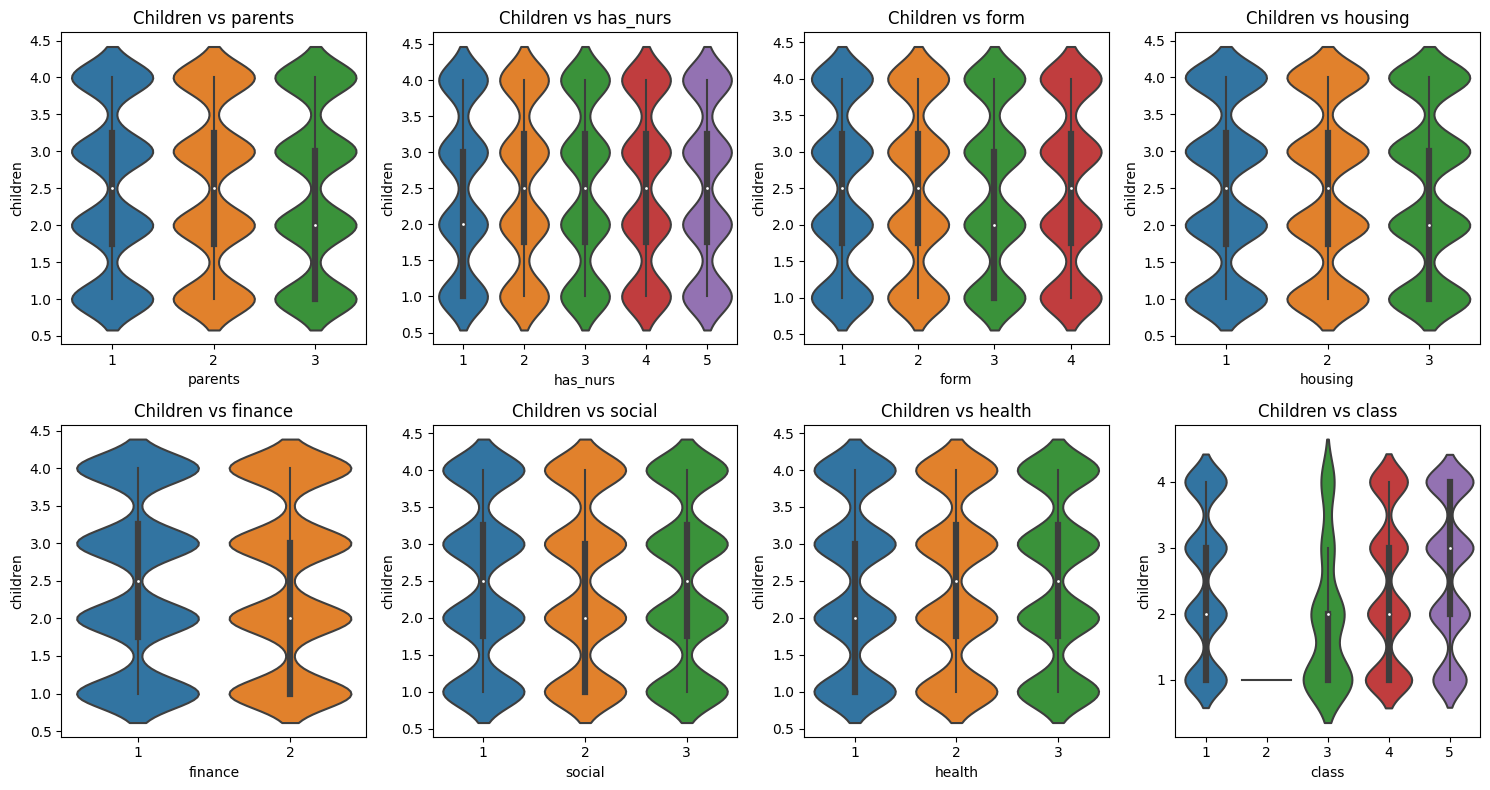

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Danh sách các biến cần so sánh
variables = ['parents', 'has_nurs', 'form', 'housing', 'finance', 'social', 'health', 'class']

# Số lượng biến
num_vars = len(variables)

# Khởi tạo figure với số lượng cột tương ứng với số biến
plt.figure(figsize=(15, 8))

# Lặp qua từng biến và vẽ biểu đồ violin
for i, var in enumerate(variables):
    plt.subplot(2, 4, i + 1)
    sns.violinplot(x=df[var], y=df['children'])
    plt.title(f'Children vs {var}')

plt.tight_layout()
plt.show()






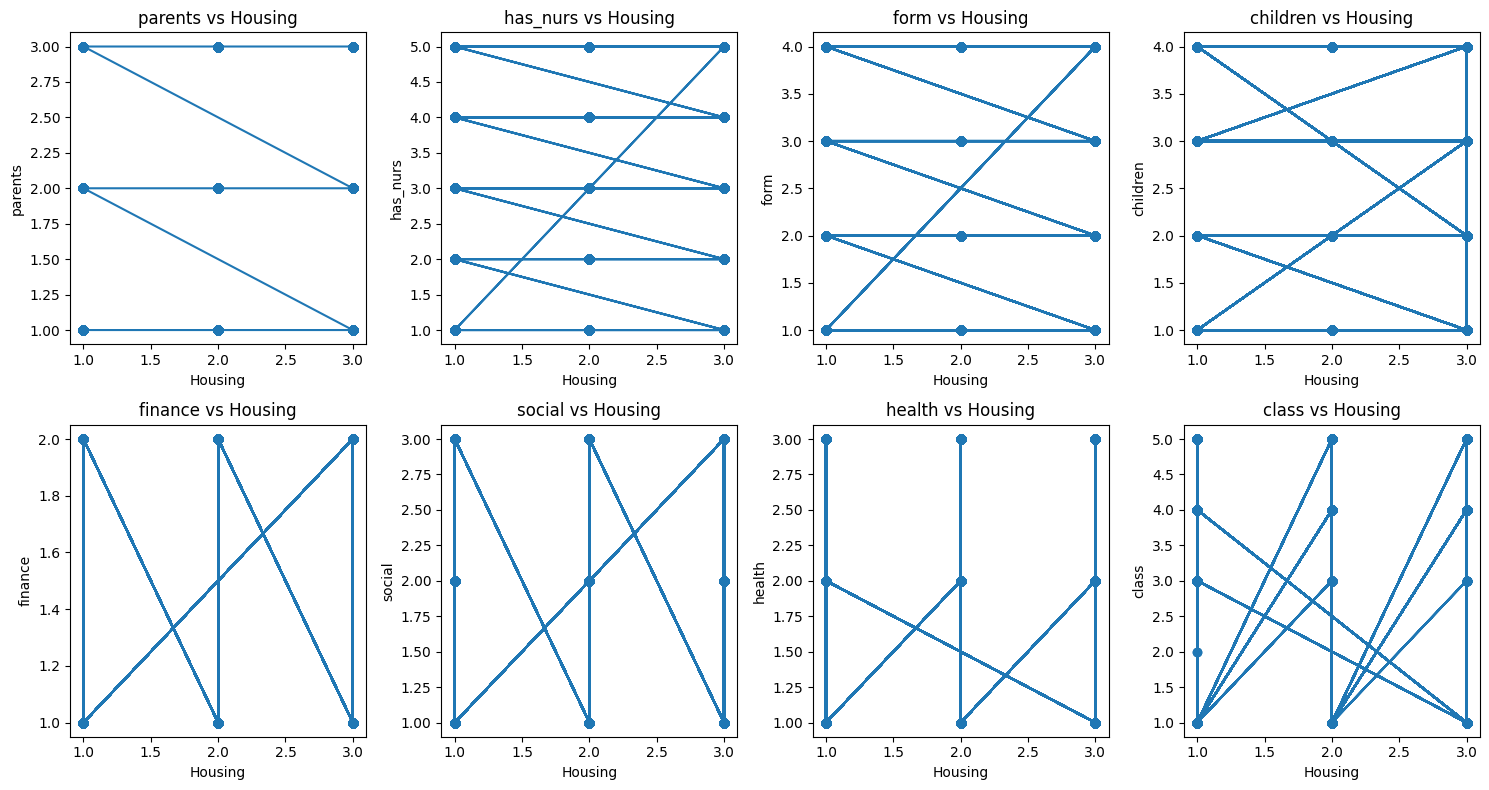

In [ ]:
import matplotlib.pyplot as plt

# Danh sách các biến để so sánh với "housing"
variables = ['parents', 'has_nurs', 'form', 'children', 'finance', 'social', 'health', 'class']

# Số lượng biến
num_vars = len(variables)

# Khởi tạo figure với số lượng cột tương ứng với số biến
plt.figure(figsize=(15, 8))

# Lặp qua từng biến và vẽ biểu đồ line plot
for i, var in enumerate(variables):
    plt.subplot(2, 4, i + 1)
    plt.plot(df['housing'], df[var], marker='o', linestyle='-')
    plt.title(f"{var} vs Housing")
    plt.xlabel("Housing")
    plt.ylabel(var)

plt.tight_layout()
plt.show()



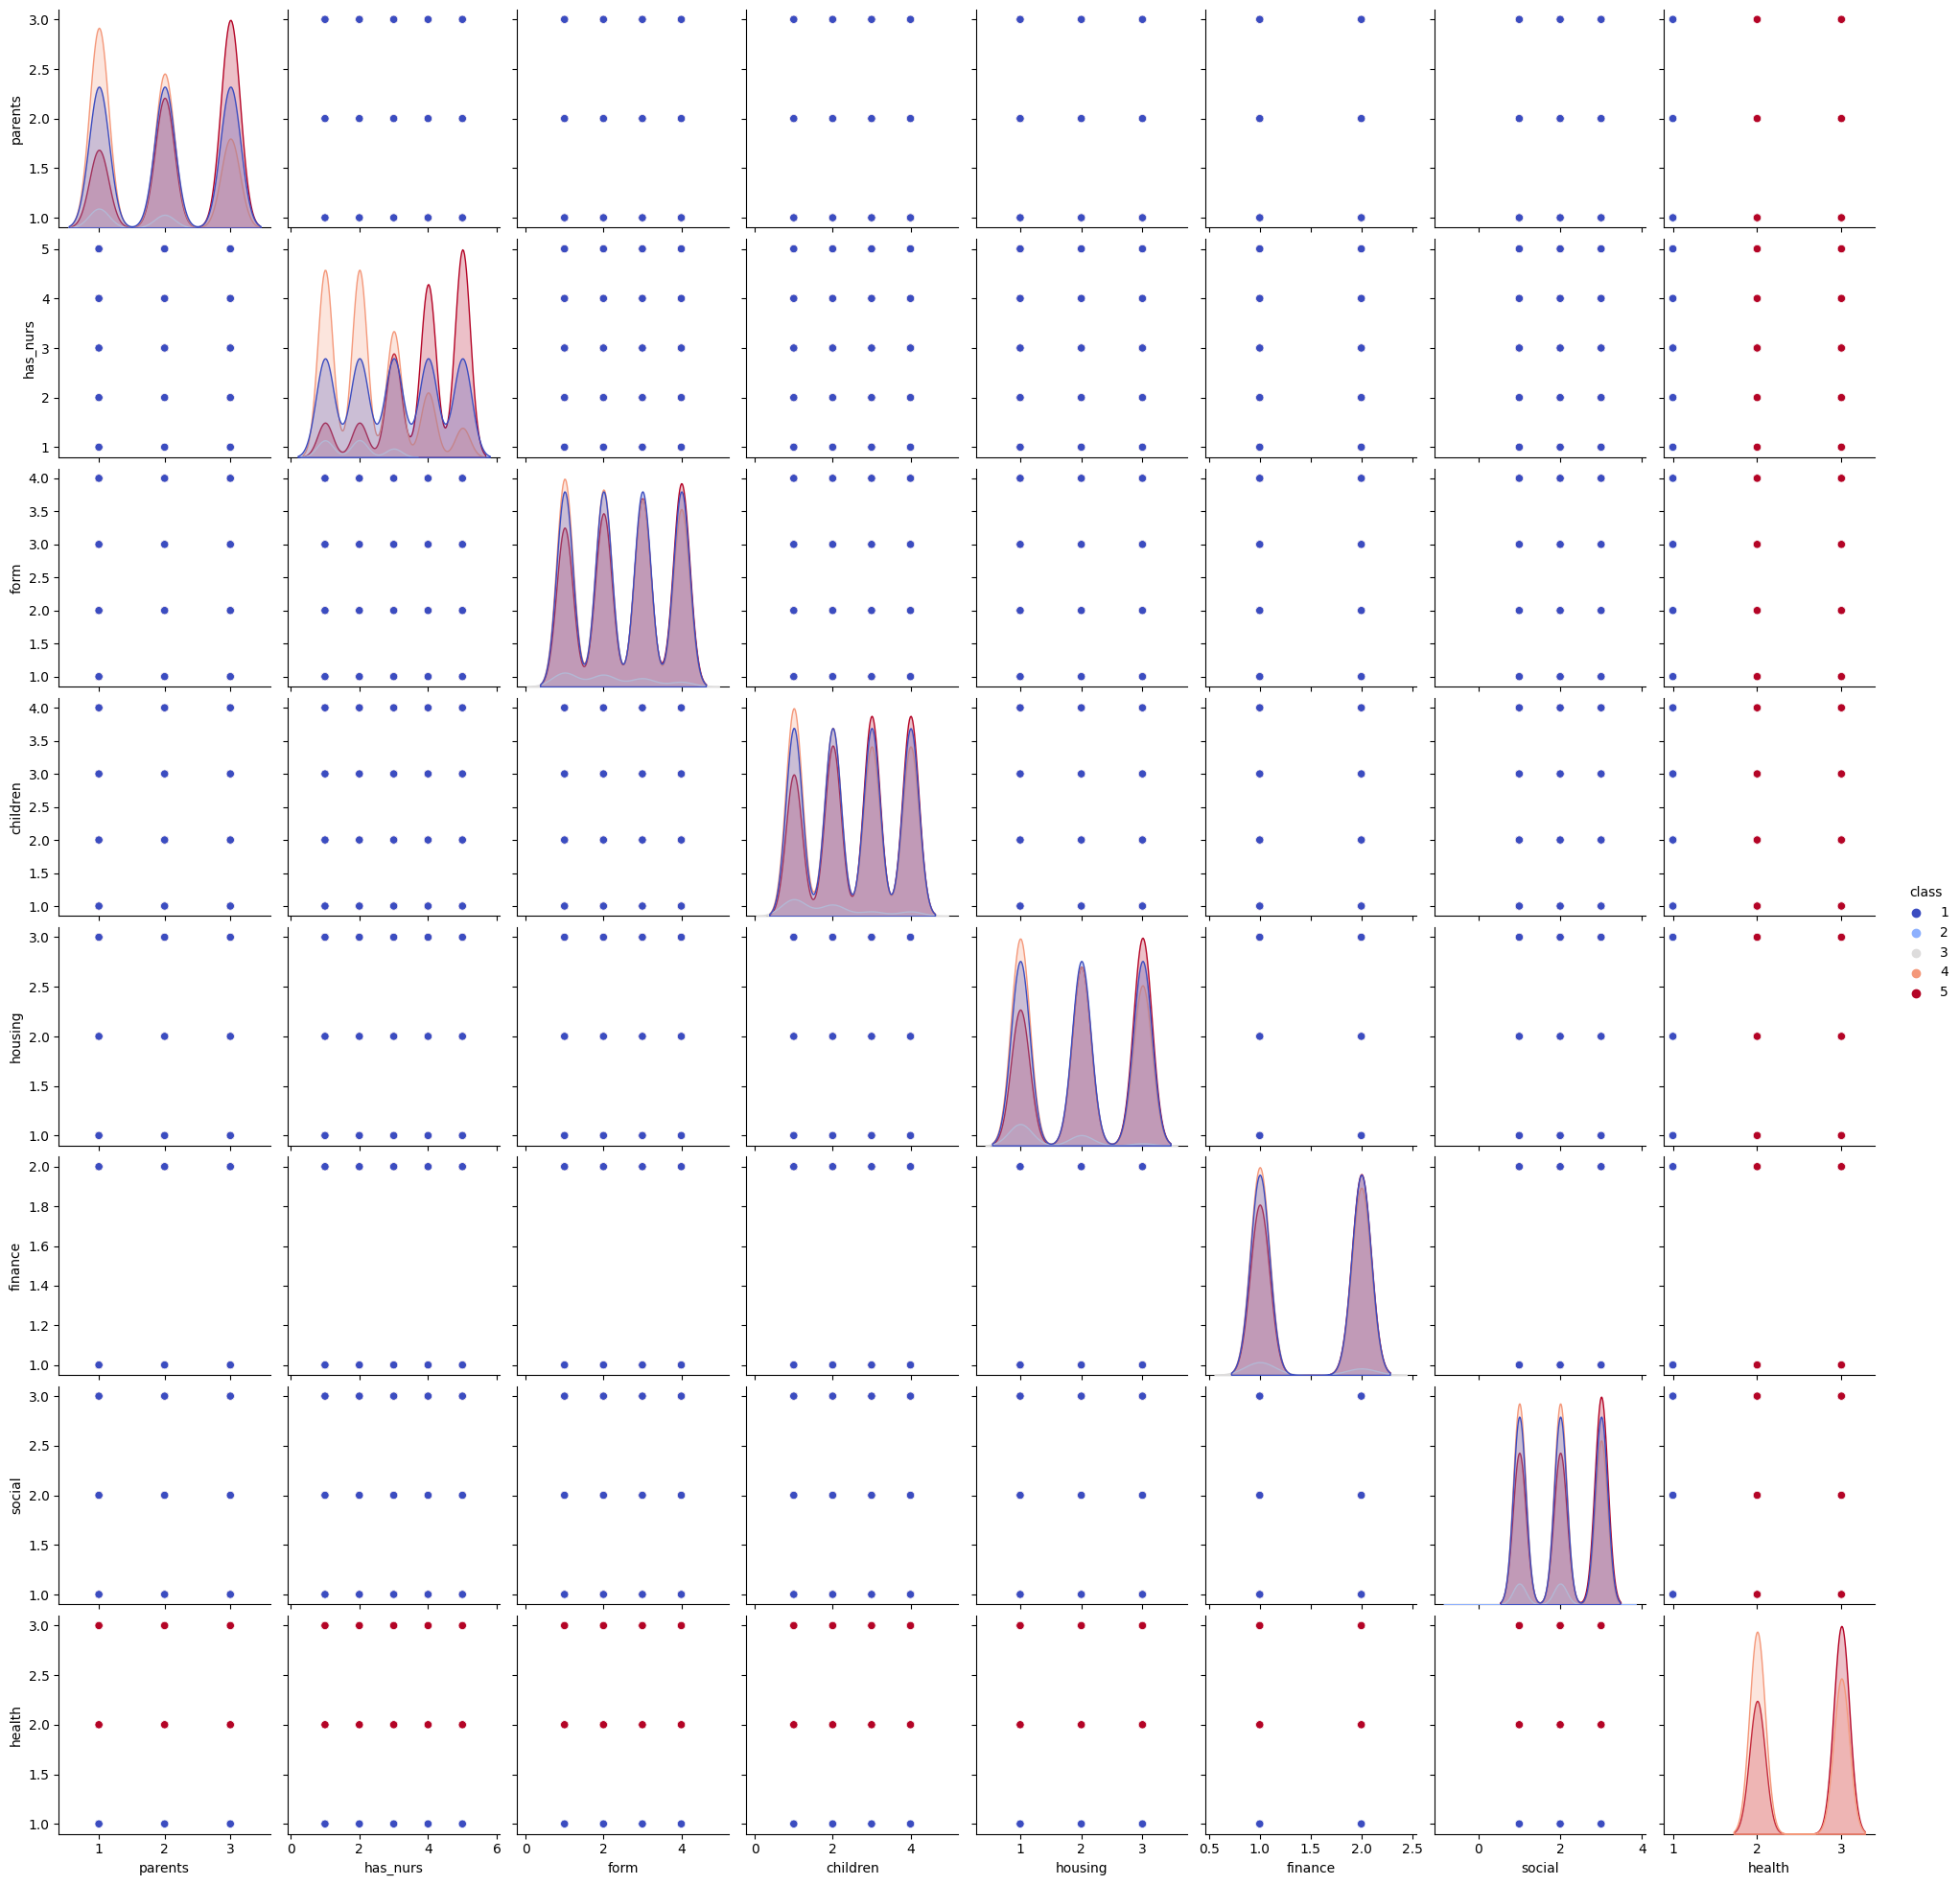

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Danh sách các biến để so sánh với "social"
variables = ['parents', 'has_nurs', 'form', 'finance', 'housing', 'health', 'class']

# Tạo DataFrame mới chỉ chứa các biến quan tâm
df_social_vs_others = df[['social'] + variables]

# Vẽ pair plot

sns.pairplot(df, diag_kind='kde', hue='class', palette='coolwarm')
plt.show()



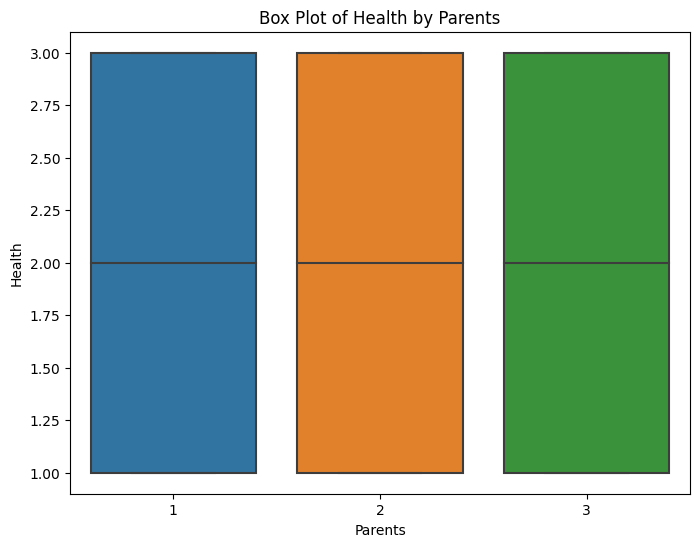

In [ ]:
# Tạo biểu đồ hòa vị
plt.figure(figsize=(8, 6))
sns.boxplot(x='parents', y='health', data=df)
plt.title('Box Plot of Health by Parents')
plt.xlabel('Parents')
plt.ylabel('Health')
plt.show()

In [ ]:
df_new = df

X = df_new.drop(['class'], axis=1);
y = df_new['class']


# # ---------------------------------------------------------------------------------------------
# Kiểm tra lại nhãn để lựa chọn thuật toán ------------------------------------------------------
print("Nhãn: ",  np.unique(df_new['class']));
print("Số lượng mỗi loại nhãn: ", df_new['class'].value_counts(), "\n");
labels = np.unique(df['class']);


# Biểu đồ thể hiện % số lượng của các nhãn trong dataset
plt.pie(df_new['class'].value_counts(), labels=labels, autopct='%1.3f%%');
plt.axis('equal');
plt.title("Đồ thị thể hiện phần trăm số lượng các nhãn");
plt.show();


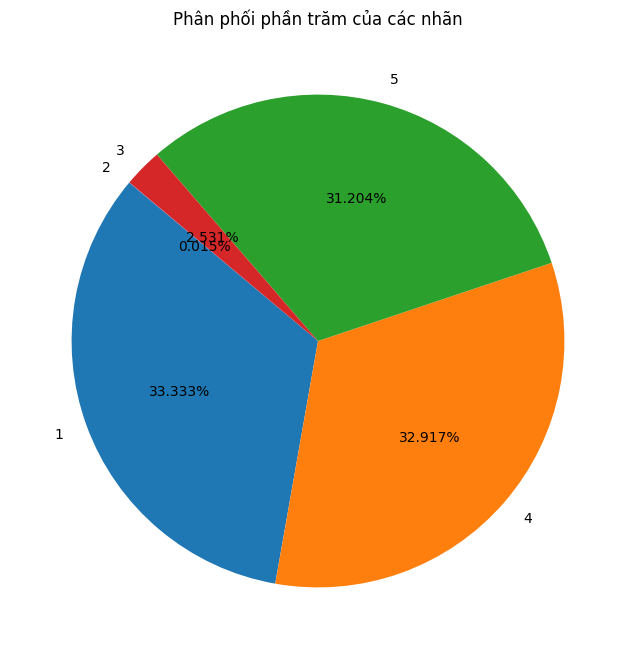

In [ ]:
# Tính toán số lần xuất hiện của mỗi giá trị trong cột
value_counts = df['class'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.3f%%', startangle=140)
plt.title(f'Phân phối phần trăm của các nhãn')
plt.show()

In [ ]:
# # #------------------------ PP TẬP HỢP MÔ HÌNH - ENSAMBLE  --------------------------------------------------
# # Sử dụng nghi thức K-Fold để xây dựng model.
# # Vì: Mẫu dữ liệu lớp thiểu số quá ít, sử dụng Hold-out sẽ ko hiệu quả trong TH này.

# Tạo một đối tượng K-Fold Cross-Validation với số lần chia là k
k = 10;
kf = KFold(n_splits=k, shuffle=True, random_state=42);

# # Tạo các biến để lưu trữ kết quả
# ARRAY LƯU TRỮ ACCURACY TRONG FOR
accuracies_RF = [];
accuracies_GBM = [];
accuracies_VC = [];

# ARRAY LƯU TRỮ F1 SCORE TRONG FOR
f1_score_RF = [];
f1_score_GBM = [];
f1_score_VC = [];

#
bias_RF = [];
bias_GB = [];
bias_VC = [];

variance_RF = [];
variance_GB = [];
variance_VC = [];

# Khởi tạo biến để tích lũy giá trị AUC
mean_auc = 0

**LỰA CHỌN BỘ THAM SỐ ĐỂ CHẠY GIẢI THUẬT**

In [ ]:
### ========================= GRIDSEARCH =======================================
# Định nghĩa các giá trị tham số cần thử nghiệm
param_grid = {
    'n_estimators': [50, 55, 60, 70, 100],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 7, 10]
}

# Khởi tạo mô hình Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Huấn luyện mô hình trên dữ liệu
grid_search.fit(X, y)

# Lấy ra bộ tham số tốt nhất
best_params = grid_search.best_params_

print("Bộ tham số tốt nhất:", best_params)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Bộ tham số tốt nhất: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 70}


In [ ]:
# Định nghĩa các giá trị tham số cần thử nghiệm
param_grid = {
    'n_estimators' : [50, 55, 60, 70, 100],
    'max_depth' : [3, 4, 5, 7, 10]
}

# Khởi tạo mô hình RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, criterion='entropy')

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(estimator = rf_model, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Huấn luyên mô hình trên dữ liệu
grid_search.fit(X, y)

# Lấy ra bộ tham số tốt nhất
best_params = grid_search.best_params_

print("Bộ tham số tốt nhất: ", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Bộ tham số tốt nhất:  {'max_depth': 10, 'n_estimators': 50}


In [ ]:
from sklearn.metrics import log_loss
# 1.    GRADIENT BOOSTING           ----------------------------------------------------------------------
for train_index, test_index in kf.split(X):
    # Tạo một mô hình Gradient Boosting với 100 cây quyết định
    gbm_model = GradientBoostingClassifier(n_estimators=70,
                                        max_depth=10,
                                        min_samples_leaf=2,
                                        learning_rate=0.2,
                                        random_state=42);

    X_train, X_test = X.iloc[train_index,], X.iloc[test_index,];
    y_train, y_test = y.iloc[train_index], y.iloc[test_index];

    # Huấn luyện mô hình trên tập dữ liệu huấn luyện
    gbm_model.fit(X_train, y_train);

    # Dự đoán trên tập test
    y_predGBM = gbm_model.predict(X_test);

    # Độ chính xác của dự đoán
    accuracyGBM = accuracy_score(y_test, y_predGBM);

    # Hiệu suất của mô hình
    f1_GBM  = f1_score(y_test, y_predGBM , average='macro');

    accuracies_GBM.append(round(accuracyGBM*100,3));
    f1_score_GBM.append(round(f1_GBM*100,3));

    # In
    print("\nĐộ chính xác GBM: {:.2f}%".format(accuracyGBM * 100));
    # print(classification_report(y_test, y_predGBM));
    print("F1 của GBM : ", round(f1_GBM ,3)*100, "%");


tb_acc_gbm = sum(accuracies_GBM) / len(accuracies_GBM);     # TRUNG BÌNH F1 CỦA GRADIENT BOOSTINGS
tb_f1_gbm = sum(f1_score_GBM) / len(f1_score_GBM);          # TRUNG BÌNH ACCURACY CỦA GRADIENT BOOSTINGS


# In kết quả trung bình độ chính xác của K-Fold qua các lần chạy
print("\n\nTRUNG BÌNH ĐỘ CHÍNH XÁC GRADIENT BOOSTINGS: ", tb_acc_gbm);   # 99%
print("\nTRUNG BÌNH HIỆU SUẤT CỦA GRADIENT BOOSTINGS: ", tb_f1_gbm);     # 93%


Độ chính xác GBM: 100.00%
F1 của GBM :  100.0 %

Độ chính xác GBM: 99.85%
F1 của GBM :  79.3 %

Độ chính xác GBM: 99.85%
F1 của GBM :  99.9 %

Độ chính xác GBM: 100.00%
F1 của GBM :  100.0 %

Độ chính xác GBM: 99.92%
F1 của GBM :  99.9 %

Độ chính xác GBM: 100.00%
F1 của GBM :  100.0 %

Độ chính xác GBM: 100.00%
F1 của GBM :  100.0 %

Độ chính xác GBM: 99.77%
F1 của GBM :  79.9 %

Độ chính xác GBM: 99.85%
F1 của GBM :  99.9 %

Độ chính xác GBM: 99.92%
F1 của GBM :  80.0 %


TRUNG BÌNH ĐỘ CHÍNH XÁC GRADIENT BOOSTINGS:  99.9153

TRUNG BÌNH HIỆU SUẤT CỦA GRADIENT BOOSTINGS:  93.8837


In [ ]:
# Tạo DataFrame với thông tin từ kết quả đo lường
data = {
    'Gradient Boosting': ['Accuracy', 'F1 Score'],
    'Kết quả': [99.939, 93.8]  # Cập nhật giá trị tương ứng ở đây
}

report_df = pd.DataFrame(data)
report_df

,Gradient Boosting,Kết quả
0,Accuracy,99.939
1,F1 Score,93.800


In [ ]:
from mlxtend.evaluate import bias_variance_decomp

In [ ]:
# 2.      RAMDOM FOREST         -------------------------------------------------------------------------
for train_index, test_index in kf.split(X):

    X_train, X_test = X.iloc[train_index,], X.iloc[test_index,];
    y_train, y_test = y.iloc[train_index], y.iloc[test_index];

    # Tạo một mô hình Random Forest với 100 cây quyết định
    rf_model = RandomForestClassifier(n_estimators=50,
                                    criterion='entropy',
                                    random_state=42);

    # Huấn luyện mô hình trên tập dữ liệu huấn luyện
    rf_model.fit(X_train, y_train);

    # Dự đoán trên tập kiểm tra
    y_predRF = rf_model.predict(X_test);

    # Độ chính xác của dự đoán
    accuracyRF = accuracy_score(y_test, y_predRF);

    # Hiệu suất mô hình
    f1_RF = f1_score(y_test, y_predRF, average='macro');

    f1_score_RF.append(round(f1_RF*100,3));
    accuracies_RF.append(round(accuracyRF*100, 3));

    print(f"\nĐộ chính xác Random Forest: {accuracyRF * 100:.2f}%");
    # print(classification_report(y_test, y_predGBM))
    print(f"F1 của Random Forest: {f1_RF * 100:.2f}%");


# # In kết quả trung bình độ chính xác qua các lần chạy
tb_acc_rf = sum(accuracies_RF) / len(accuracies_RF);
tb_f1_rf = sum(f1_score_RF) / len(f1_score_RF);


# In kết quả trung bình độ chính của K-Fold qua các lần chạy
print("\n\nTRUNG BÌNH ĐỘ CHÍNH XÁC RANDOM FOREST: ", tb_acc_rf, "%");   # 99%
print("\nTRUNG BÌNH HIỆU SUẤT CỦA RANDOM FOREST: ", tb_f1_rf, "%");     # 91 - 93%




Độ chính xác Random Forest: 99.31%
F1 của Random Forest: 99.46%

Độ chính xác Random Forest: 99.69%
F1 của Random Forest: 79.19%

Độ chính xác Random Forest: 99.69%
F1 của Random Forest: 99.75%

Độ chính xác Random Forest: 99.85%
F1 của Random Forest: 99.88%

Độ chính xác Random Forest: 99.61%
F1 của Random Forest: 99.71%

Độ chính xác Random Forest: 99.69%
F1 của Random Forest: 99.16%

Độ chính xác Random Forest: 99.85%
F1 của Random Forest: 99.88%

Độ chính xác Random Forest: 99.61%
F1 của Random Forest: 99.70%

Độ chính xác Random Forest: 99.85%
F1 của Random Forest: 99.88%

Độ chính xác Random Forest: 99.46%
F1 của Random Forest: 99.01%


TRUNG BÌNH ĐỘ CHÍNH XÁC RANDOM FOREST:  99.66050000000001 %

TRUNG BÌNH HIỆU SUẤT CỦA RANDOM FOREST:  97.56179999999999 %


In [ ]:
dudoan= rf_model.predict([[1,1,1,1,1,1,1,1]]);

if dudoan[0] == 1:
    result = "not_recom"
elif dudoan[0] == 2:
    result = "recommended"
elif dudoan[0] == 3:
     result = "very_recom"
elif dudoan[0] == 4:
     result = "priority"
elif dudoan[0] == 5:
      result = "spec_prior"

result

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'not_recom'

In [ ]:
# Tạo DataFrame với thông tin từ kết quả đo lường
data = {
    'Random Forest': ['Accuracy', 'F1 Score'],
    'Kết quả': [99.70, 97.64]  # Cập nhật giá trị tương ứng ở đây
}

report_df = pd.DataFrame(data)
report_df


,Random Forest,Kết quả
0,Accuracy,99.70
1,F1 Score,97.64


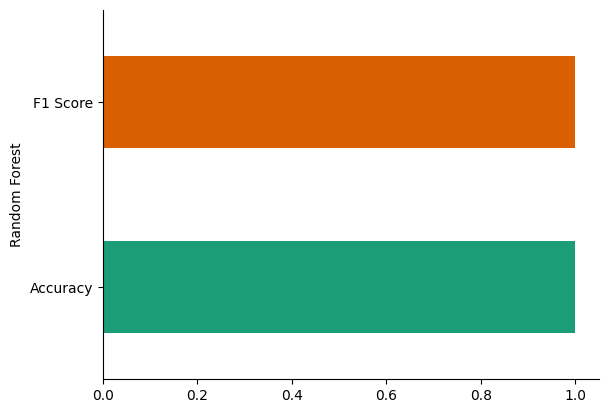

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
report_df.groupby('Random Forest').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# 3.    VOTING CLASSIFIER              -------------------------------------------------------------

# # Kết hợp các mô hình trong một VotingClassifier
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,], X.iloc[test_index,];
    y_train, y_test = y.iloc[train_index], y.iloc[test_index];

    rf_classifier = RandomForestClassifier(n_estimators=60,
                                        criterion='entropy',
                                        random_state=42);
    gbm_classifier = GradientBoostingClassifier(n_estimators=60,
                                            max_depth=10,
                                            min_samples_leaf=2,
                                            learning_rate=0.2,
                                            random_state=42);


    ensemble_classifier = VotingClassifier(estimators=[
        ('random_forest', rf_classifier),
        ('gradient_boosting', gbm_classifier)
    ], voting='hard')

    # Huấn luyện mô hình Ensemble
    ensemble_classifier.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = ensemble_classifier.predict(X_test);

    # Đánh giá hiệu suất của mô hình
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nĐộ chính xác tổng thể của Ensemble: {accuracy * 100:.2f}%")
    # f1_corce
    f1_Ensemble = f1_score(y_test, y_pred, average='macro');
    print(f"F1 của Ensemble: {f1_Ensemble*100:.2f}%");
    accuracies_VC.append(round(accuracy*100,3));
    f1_score_VC.append(round(f1_Ensemble*100,3));


# # # In kết quả trung bình độ chính xác qua các lần chạy
tb_acc_vc = sum(accuracies_VC) / len(accuracies_VC);
tb_f1_vc = sum(f1_score_VC) / len(f1_score_VC);


# In kết quả trung bình độ chính của K-Fold qua các lần chạy
print(f"\n\nTRUNG BÌNH ĐỘ CHÍNH XÁC VOTING CLASSIFIER:{tb_acc_vc: .2f}");  # 99%
print(f"\nTRUNG BÌNH HIỆU SUẤT CỦA VOTING CLASSIFIER:{tb_f1_vc: .2f} ");   # 95%


Độ chính xác tổng thể của Ensemble: 99.61%
F1 của Ensemble: 99.70%

Độ chính xác tổng thể của Ensemble: 99.77%
F1 của Ensemble: 79.24%

Độ chính xác tổng thể của Ensemble: 99.77%
F1 của Ensemble: 99.81%

Độ chính xác tổng thể của Ensemble: 100.00%
F1 của Ensemble: 100.00%

Độ chính xác tổng thể của Ensemble: 99.85%
F1 của Ensemble: 99.88%

Độ chính xác tổng thể của Ensemble: 99.92%
F1 của Ensemble: 99.94%

Độ chính xác tổng thể của Ensemble: 99.85%
F1 của Ensemble: 99.88%

Độ chính xác tổng thể của Ensemble: 99.54%
F1 của Ensemble: 79.73%

Độ chính xác tổng thể của Ensemble: 99.77%
F1 của Ensemble: 99.82%

Độ chính xác tổng thể của Ensemble: 100.00%
F1 của Ensemble: 100.00%


TRUNG BÌNH ĐỘ CHÍNH XÁC VOTING CLASSIFIER: 99.81

TRUNG BÌNH HIỆU SUẤT CỦA VOTING CLASSIFIER: 95.80 


In [ ]:
# Tạo DataFrame với thông tin từ kết quả đo lường
data = {
    'Voting': ['Accuracy', 'F1 Score'],
    'Kết quả': [99.81, 95.80]  # Cập nhật giá trị tương ứng ở đây
}

report_df = pd.DataFrame(data)
report_df

,Voting,Kết quả
0,Accuracy,99.81
1,F1 Score,95.80


from matplotlib import pyplot as plt
report_df['Kết quả'].plot(kind='hist', bins=20, title='Kết quả')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
report_df.groupby('Voting').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
report_df['Kết quả'].plot(kind='line', figsize=(8, 4), title='Kết quả')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(report_df['Voting'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(report_df, x='Kết quả', y='Voting', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
print(f1_score_VC)

[97.463, 77.749, 97.263, 96.706, 97.964, 96.977, 97.536, 95.985, 99.333, 98.516]


In [ ]:
# SO SANH THEM VỚI KNN, BAYES, SVM

tb_f1_bayes = [];
tb_f1_knn = [];
tb_f1_svm = [];
i = 0;

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,], X.iloc[test_index,];
    y_train, y_test = y.iloc[train_index], y.iloc[test_index];
    # Tạo một mô hình KNN với k = 5
    knn = KNeighborsClassifier(n_neighbors=5);

    # Huấn luyện mô hình trên tập train
    knn.fit(X_train, y_train);

    # Dự đoán
    y_pred = knn.predict(X_test);
    # Đánh giá mô hình bằng accuracy_score
    accuracy_knn = accuracy_score(y_test, y_pred);
    # f1_corce
    f1_knn = f1_score(y_test, y_pred, average='macro');
    tb_f1_knn.append(f1_knn);

    # ----------------------------------------------------------------
    #BAYES
    # 1. xay dung mo hinh dua tren phan phoi xac suat tuan theo Gaussian
    bayes_ = GaussianNB()

    # huấn luyện
    bayes_.fit(X_train, y_train)

    # 2. du doan
    y_bayesPred = bayes_.predict(X_test)
    # Đánh giá mô hình bằng accuracy_score
    accuracy_bayes = accuracy_score(y_test, y_pred);
    # f1_corce
    f1_bayes = f1_score(y_test, y_bayesPred, average='macro');
    tb_f1_bayes.append(f1_bayes);

    # -------------------------------------------------
    # SVM
    # Tạo mô hình SVM
    svm_ = svm.SVC(kernel='rbf', C=1);

    # Huấn luyện mô hình trên tập train
    svm_.fit(X_train, y_train);

    # Dự đoán
    y_svmpred = svm_.predict(X_test);

    # Đánh giá mô hình
    accuracy_svm = accuracy_score(y_test, y_svmpred);
    f1_svm = f1_score(y_test, y_svmpred, average='macro');
    tb_f1_svm.append(f1_svm);


    # ----------------------------------------------------------------
    i = i+1;
    print("\n=========== LẦN ", i , "==================\n");
    print(f"Độ chính xác tổng thể của KNN: {accuracy_knn * 100:.2f}%");  # f {} -> f-string
    print("F1 của KNN: ", round(f1_knn,3)*100, "%");

    print(f"Độ chính xác tổng thể của BAYES: {accuracy_bayes * 100:.2f}%");  # f {} -> f-string
    print("F1 của BAYES: ", round(f1_bayes, 3)*100, "%");

    print(f"Độ chính xác của mô hình với SVM: {accuracy_svm * 100 : .2f}%");
    print("F1 của SVM: ", round(f1_svm, 3)*100, "%");


tb_knn = sum(tb_f1_knn) / len(tb_f1_knn)*100;
tb_bayes = sum(tb_f1_bayes) / len(tb_f1_bayes)*100;
tb_svm = sum(tb_f1_svm) / len(tb_f1_svm)*100;

print("\n\n");
print("F1 - KNN ", tb_knn);
print("F1 - BAYES ", tb_bayes);
print("F1 - SVM ", tb_svm);


=========== LẦN  1 ==================

Độ chính xác tổng thể của KNN: 95.37%
F1 của KNN:  94.5 %
Độ chính xác tổng thể của BAYES: 95.37%
F1 của BAYES:  64.9 %
Độ chính xác của mô hình với SVM:  98.23%
F1 của SVM:  96.1 %

=========== LẦN  2 ==================

Độ chính xác tổng thể của KNN: 95.37%
F1 của KNN:  73.8 %
Độ chính xác tổng thể của BAYES: 95.37%
F1 của BAYES:  51.9 %
Độ chính xác của mô hình với SVM:  98.30%
F1 của SVM:  76.6 %

=========== LẦN  3 ==================

Độ chính xác tổng thể của KNN: 95.91%
F1 của KNN:  96.2 %
Độ chính xác tổng thể của BAYES: 95.91%
F1 của BAYES:  66.0 %
Độ chính xác của mô hình với SVM:  98.92%
F1 của SVM:  98.3 %

=========== LẦN  4 ==================

Độ chính xác tổng thể của KNN: 96.22%
F1 của KNN:  96.3 %
Độ chính xác tổng thể của BAYES: 96.22%
F1 của BAYES:  66.4 %
Độ chính xác của mô hình với SVM:  98.38%
F1 của SVM:  96.3 %

=========== LẦN  5 ==================

Độ chính xác tổng thể của KNN: 94.44%
F1 của KNN:  93.4 %
Độ chính xác t

In [ ]:
# Tạo DataFrame với thông tin từ kết quả đo lường
data = {
    'Thuật toán': ['KNN', 'Bayes', 'SVM'],
    'Accuracy': [93.8, 95.14, 98.4],
    'F1 Score': [92.49, 62.28, 94.90] # Cập nhật giá trị tương ứng ở đây
}

report_df = pd.DataFrame(data)
report_df

In [ ]:
# Tạo DataFrame với thông tin từ kết quả đo lường
data = {
    'Thuật toán': ['Random Forest', 'Gradient Boosting','Voting', 'KNN', 'Bayes', 'SVM'],
    'Accuracy': [99.70, 99.939, 99.81, 93.8, 95.14, 98.4],
    'F1 Score': [97.64, 93.8, 95.80, 92.49, 62.28, 94.90] # Cập nhật giá trị tương ứng ở đây
}

report_df = pd.DataFrame(data)
report_df

,Thuật toán,Accuracy,F1 Score
0,Random Forest,99.700,97.64
1,Gradient Boosting,99.939,93.80
2,Voting,99.810,95.80
3,KNN,93.800,92.49
4,Bayes,95.140,62.28
5,SVM,98.400,94.90


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(report_df['Thuật toán'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(report_df, x='Accuracy', y='Thuật toán', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from matplotlib import pyplot as plt
report_df['F1 Score'].plot(kind='line', figsize=(8, 4), title='F1 Score')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
report_df['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

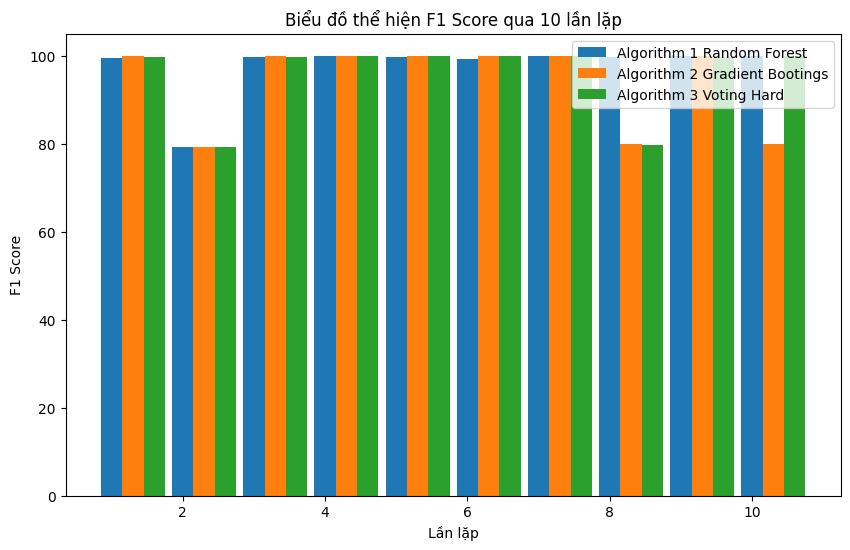

In [ ]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6));
# Assuming f1_score_GBM has 10 data points
f1_score_GBM = f1_score_GBM[:10]
bar_width = 0.3;
index = range(1, 11);

plt.bar(index, f1_score_RF, bar_width, label='Algorithm 1 Random Forest');
plt.bar([i + bar_width for i in index], f1_score_GBM, bar_width, label='Algorithm 2 Gradient Bootings');
plt.bar([i + 2 * bar_width for i in index], f1_score_VC, bar_width, label='Algorithm 3 Voting Hard');
plt.xlabel('Lần lặp');
plt.ylabel('F1 Score');
plt.legend();
plt.title('Biểu đồ thể hiện F1 Score qua 10 lần lặp');
plt.show();

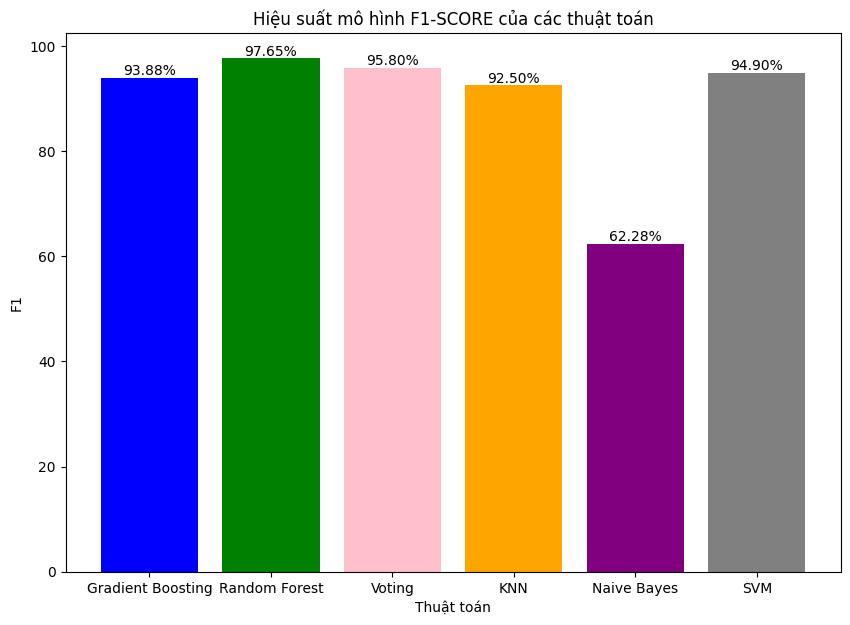

In [ ]:
algorithms = ['Gradient Boosting', 'Random Forest', 'Voting', 'KNN', 'Naive Bayes', 'SVM']
F1 = [];
F1.append(tb_f1_gbm)
F1.append(tb_f1_rf)
F1.append(tb_f1_vc)
F1.append(tb_knn)
F1.append(tb_bayes)
F1.append(tb_svm)
# Chỉnh màu sắc của cột
colors = ['blue', 'green', 'pink','orange', 'purple', 'gray']
plt.figure(figsize=(10,7))
# Hiển thị giá trị cụ thể lên cột
for i in range(len(F1)):
    plt.text(i, F1[i], f'{F1[i]:.2f}%', ha='center', va='bottom')


plt.bar(algorithms, F1, color=colors)
plt.xlabel('Thuật toán')
plt.ylabel('F1')
plt.title('Hiệu suất mô hình F1-SCORE của các thuật toán')

plt.show()

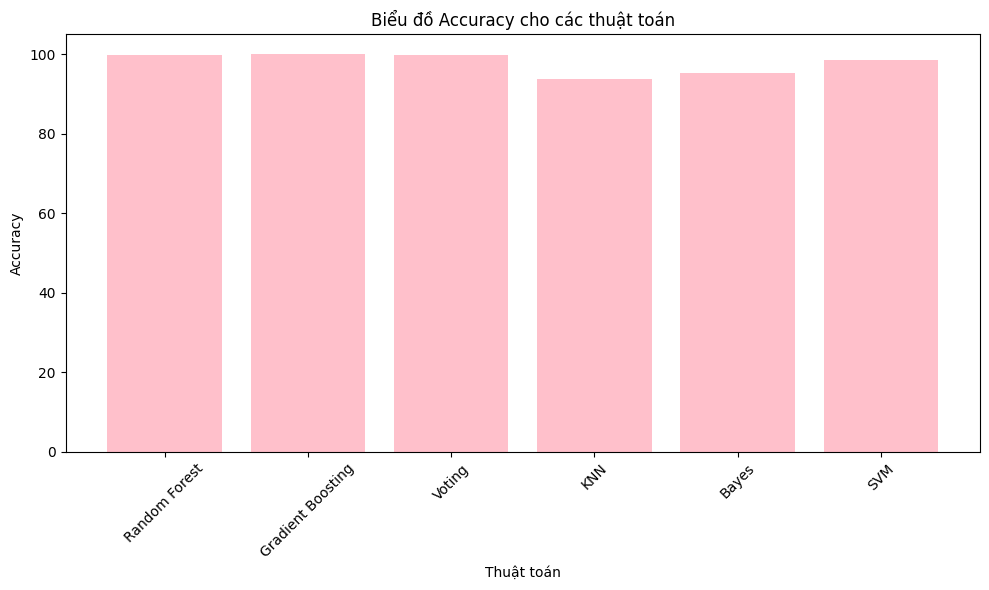

In [ ]:
import matplotlib.pyplot as plt

data = {
    'Thuật toán': ['Random Forest', 'Gradient Boosting', 'Voting', 'KNN', 'Bayes', 'SVM'],
    'Accuracy': [99.70, 99.939, 99.81, 93.8, 95.14, 98.4]
}

# Tạo DataFrame từ dữ liệu
df = pd.DataFrame(data)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(df['Thuật toán'], df['Accuracy'], color='pink')
plt.xlabel('Thuật toán')
plt.ylabel('Accuracy')
plt.title('Biểu đồ Accuracy cho các thuật toán')
plt.xticks(rotation=45)  # Xoay nhãn trục x nếu cần
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

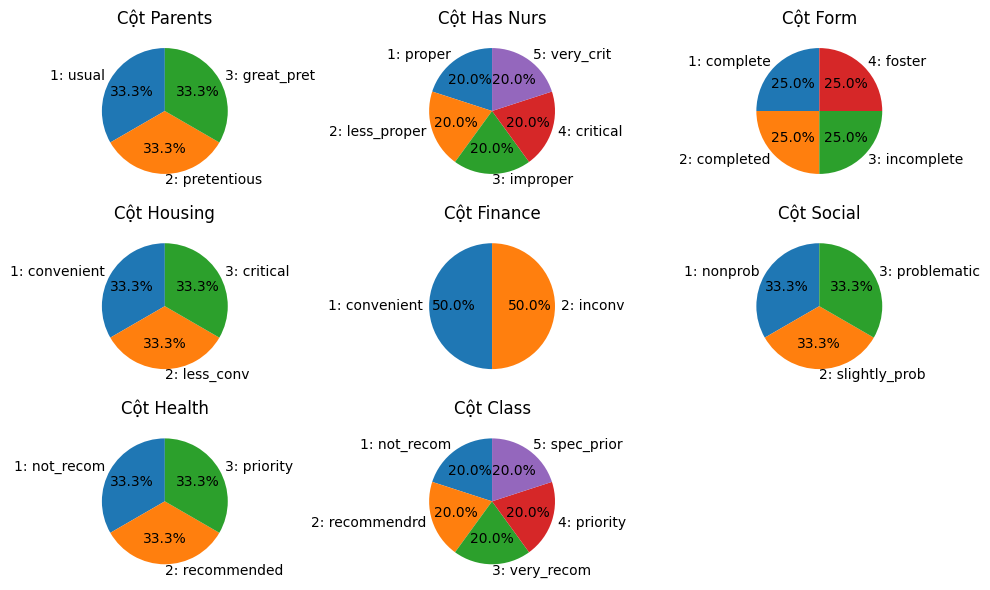

In [ ]:
data = [
    'parents: usual, pretentious, great_pret: 1, 2, 3',
    'has_nurs: proper, less_proper, improper, critical, very_crit: 1, 2, 3',
    'form: complete, completed, incomplete, foster: 1, 2, 3, 4',
    'children: 1, 2, 3, 4: 1, 2, 3, 4',
    'housing: convenient, less_conv, critical: 1, 2, 3',
    'finance: convenient, inconv: 1, 2',
    'social: non-prob, slightly_prob, problematic: 1, 2, 3',
    'health: not_recom, recommended, priority: 1, 2, 3',
    'class: not_recom, recommended, very_recom, priority, spec_prior: 1, 2, 3, 4, 5 '
]
parents = {1: 'usual', 2: 'pretentious', 3: 'great_pret'}
has_nurs = {1:'proper', 2: 'less_proper', 3: 'improper', 4: 'critical', 5: 'very_crit'}
form = {1: 'complete', 2: 'completed', 3: 'incomplete', 4: 'foster', }
housing = {1: 'convenient', 2: 'less_conv', 3: 'critical', }
finance = {1: 'convenient', 2: 'inconv'}
social = {1: 'nonprob', 2: 'slightly_prob', 3: 'problematic' }
health = {1: 'not_recom', 2: 'recommended', 3: 'priority', }
class_mapping = {1: 'not_recom', 2: 'recommendrd', 3: 'very_recom', 4: 'priority',  5: 'spec_prior', }


# Tạo danh sách các từ điển ánh xạ
mapping_dicts = {
    'Parents': parents,
    'Has Nurs': has_nurs,
    'Form': form,
    'Housing': housing,
    'Finance': finance,
    'Social': social,
    'Health': health,
    'Class': class_mapping
}

# # Tạo biểu đồ tròn cho từng từ điển ánh xạ
# for colname, mapping in mapping_dicts.items():
#     keys = list(mapping.keys())
#     values = list(mapping.values())

#     # Tạo biểu đồ tròn
#     plt.figure(figsize=(8, 6))
#     plt.pie([1] * len(keys), labels=[f'{key}: {value}' for key, value in zip(keys, values)], startangle=90)

#     plt.title(f'{colname} Mapping')
#     plt.show()


# Số cột bạn muốn hiển thị trong mỗi hàng
num_columns = 3

# Số hàng
num_rows = len(mapping_dicts) // num_columns + (len(mapping_dicts) % num_columns > 0)

# Tỷ lệ chiều cao giữa các hàng
height_ratios = [1] * num_rows  # Điều chỉnh chiều cao ở đây

# Tạo lưới biểu đồ với tỷ lệ chiều cao được chỉnh
fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 2*num_rows), gridspec_kw={'height_ratios': height_ratios})

# Duyệt qua từ điển ánh xạ và vẽ biểu đồ tròn
for i, (colname, mapping) in enumerate(mapping_dicts.items()):
    row = i // num_columns
    col = i % num_columns
    sizes = [len(mapping) for mapping in mapping.values()]
    labels = mapping.values()
    keys = list(mapping.keys())
    values = list(mapping.values())

    # Nếu chỉ có một hàng, sử dụng chỉ số hàng, ngược lại, sử dụng chỉ số hàng và chỉ số cột
    if num_rows == 1:
        axes[col].pie([1] * len(keys), labels=[f'{key}: {value}' for key, value in zip(keys, values)],autopct='%1.1f%%', startangle=90)
        axes[col].set_title(f'Cột {colname}')
    else:
        axes[row, col].pie([1] * len(keys), labels=[f'{key}: {value}' for key, value in zip(keys, values)],autopct='%1.1f%%', startangle=90)
        axes[row, col].set_title(f'Cột {colname}')

# Ẩn các trục trống (nếu có)
for i in range(len(mapping_dicts), num_rows * num_columns):
    if num_rows == 1:
        axes[i].axis('off')
    else:
        row = i // num_columns
        col = i % num_columns
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()

